In [1]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
import src.network as network
import src.network_utils as net_utils

# Hyperparameter Tuning

## Preliminary Testing

This test trains a single hidden layer, 3 neuron network over the `triangle.png` binary classification problem for various learning rate values over 50 epochs with a mini batch size of 16. The main objective of the test is to determine an estimate for an appropriate learning rate and number of epochs.  

Note that the test was also run for a single hidden layer, 4 neuron network over the `square.png` data as well as a double hidden layer 8x2 neuron network over the `concave_rectangle.png` data with minimal changes to the following code.

In [ ]:
image = 'data/triangle.png'
num_neurons = 3
mini_batch_size = 16
epochs = 50
epoch_mod = 0

data, labels = net_utils.generate_image_data(image, 15000, (1000,1000))
training_data = data[0:10000]
training_labels = labels[0:10000]
test_data = data[10000:15000]
test_labels = labels[10000:15000]

etas = np.linspace(1, 32, 50)
accuracies = np.zeros([len(etas), epochs])

for i in range(len(etas)):
    net = network.Network([network.Linear(2, num_neurons),
                           network.Sigmoid(),
                           network.Linear(num_neurons, 1),
                           network.Sigmoid()])
    
    for j in range(epochs):
        net.train(training_data, training_labels, mini_batch_size, etas[i], 1, 0)
        accuracies[i,j] = net.evaluate_percentage(test_data, test_labels)
    
    print(f'Network {i+1} of {len(etas)} evaluated.')
    
print('Saving accuracy data.')
np.save('out/hyperparameter_tuning/triangle_accuracies.npy', accuracies)

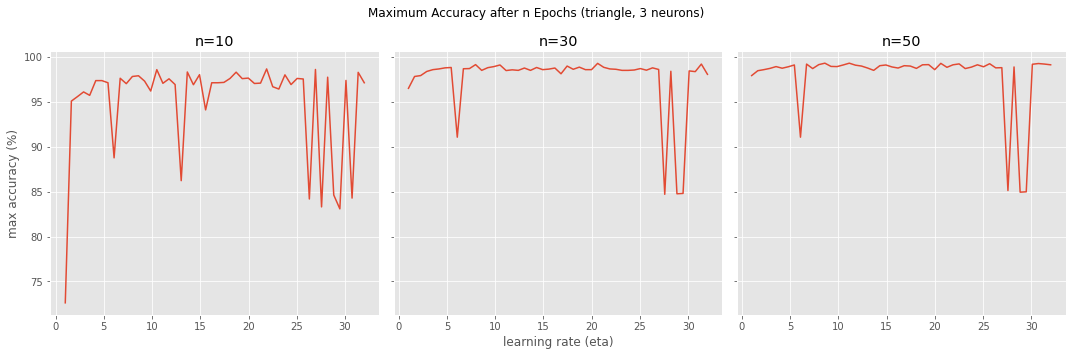

In [28]:
acc = np.load('out/hyperparameter_tuning/triangle_accuracies.npy')
epochs = [10, 30, 50]
etas = np.linspace(1, 32, 50)

fig, axs = plt.subplots(1, len(epochs), sharey=True, figsize=(15, 5))
for i in range(len(epochs)):
    epoch_acc = np.max(acc[:, 0:epochs[i]], axis=1)
    axs[i].plot(etas, epoch_acc)
    axs[i].set_title(f'n={epochs[i]}')
    axs[i].grid(True)

axs[1].set_xlabel('learning rate (eta)')
axs[0].set_ylabel('max accuracy (%)')
plt.suptitle('Maximum Accuracy after n Epochs (triangle, 3 neurons)')
plt.tight_layout()
plt.style.use('ggplot')
plt.savefig('out/hyperparameter_tuning/triangle_max_accuracies.png')
plt.show()

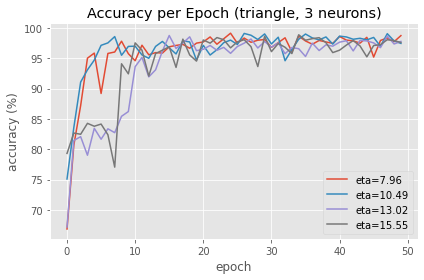

In [33]:
acc = np.load('out/hyperparameter_tuning/triangle_accuracies.npy')
etas = np.linspace(1, 32, 50)
index = [11, 15, 19, 23]
epochs = np.arange(50)

for i in range(len(index)):
    eta_acc = acc[index[i], :]
    plt.plot(epochs, eta_acc, label=f'eta={round(etas[index[i]], 2)}')

plt.title(f'Accuracy per Epoch (triangle, 3 neurons)')
plt.xlabel('epoch')
plt.ylabel('accuracy (%)')
plt.tight_layout()
plt.legend(loc='lower right')
plt.style.use('ggplot')
plt.savefig('out/hyperparameter_tuning/triangle_learning_rates.png')
plt.show()

## Results

The plots of the maximum network accuracy after 10, 30, and 50 epochs for the three test problems indicate that the most suitable range for the learning rate is between 5 and 15. For learning rates more than 15, there seems to be more instances of networks not converging to a significant accuracy in all 3 test problems. For learning rates less than 5, the tests indicate that there is a slight drop in maximum accuracy.  

The accuracy per epoch plots for the 3 test cases were produced for learning rates of 7.96, 10.49, 13.02, and 15.55. Based on the three test problems, the accuracy becomes very similar for all learning rates beyond the 20th epoch.  

We also note that after 50 epochs, the accuracy becomes very consistent between all three thest problems. However, the increase in consistency over the accuracry after 20 epochs does not warrant the extra training time for the purposes of theses experiments, which are more interested in efficient network convergence, rather than optimized accuracy.  

Hence, for this type of classification problem, a learning rate of __eta=12.0__ and a training period of __20 epochs__ is suggested.